In [1]:
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator, smart_resize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, Rescaling, GaussianNoise, DepthwiseConv2D
from tensorflow.data import Dataset
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import warnings
import re

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
PATH = './'
BATCH_SIZE = 16
SEED = 473

In [7]:
def generate_df(dataset_root, csv_name):
    df = pd.read_csv(f'{dataset_root}/{csv_name}', header=None, names=['filename'])
    df['class'] = (df.filename.str.extract('study.*_(positive|negative)'))
    return df

In [5]:
dataset_root = './MURA-v1.1/'

In [9]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255)
train_gen = datagen.flow_from_dataframe(generate_df(dataset_root, 'train_image_paths.csv'),
                                        directory=None,
                                        target_size=(224, 224),
                                        class_mode='binary')

valid_gen = datagen.flow_from_dataframe(generate_df(dataset_root, 'valid_image_paths.csv'),
                                        directory=None,
                                        target_size=(224, 224),
                                        class_mode='binary')

Found 36297 validated image filenames belonging to 2 classes.
Found 3140 validated image filenames belonging to 2 classes.


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plots(ims, figsize=(12,6), rows=3, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        if i+1 == 7: break
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        print(ims[i])
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [8]:
from util.loader import get_valid_gen

loader = get_valid_gen()

Found 3197 validated image filenames belonging to 2 classes.


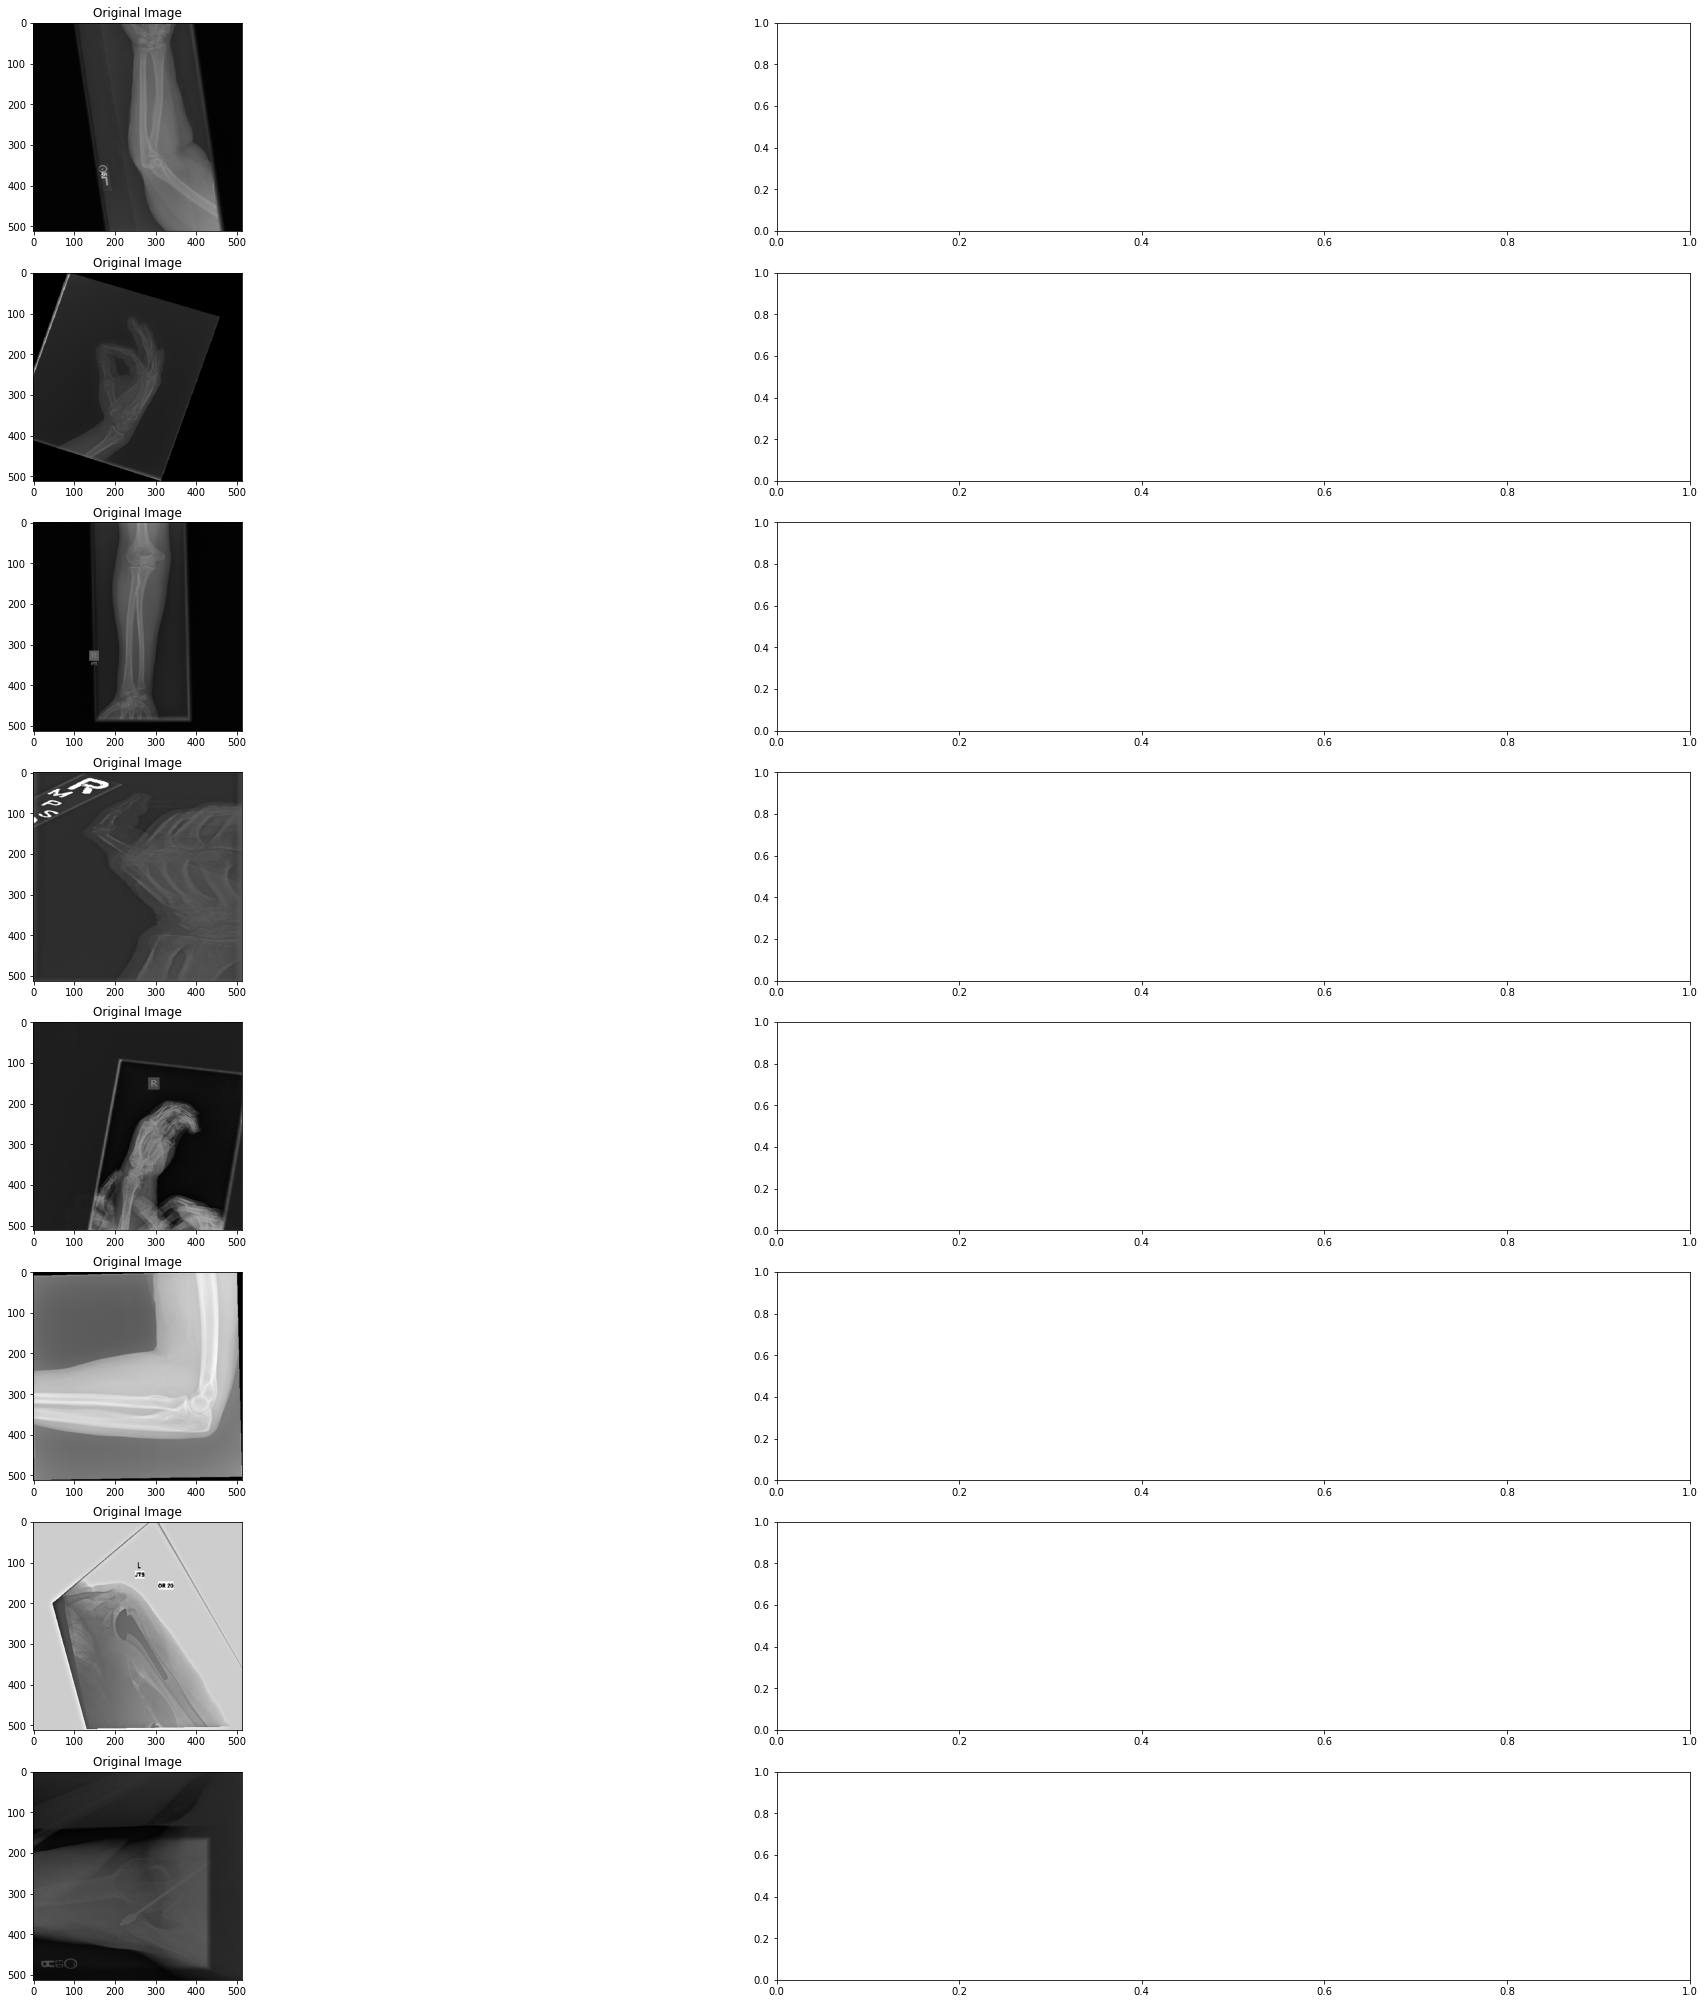

In [12]:
for x,y in iter(loader):
    nrows = x.shape[0]
    fig, rows = plt.subplots(nrows=nrows, ncols=2, figsize=(36, 36))
    for idx,row in enumerate(rows):
        row[0].imshow(x[idx,:,:,:])
        row[0].set_title('Original Image')
    break

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8368828615153551184
xla_global_id: -1
]


In [3]:
!pip list | grep "tensorflow"

tensorflow                   2.10.0
tensorflow-addons            0.18.0
tensorflow-estimator         2.10.0


In [1]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.
